# Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data
**Part 1: Reading and Writing Files in Python**  

*Mark Bauer*  
*Updated: 9/28/20*

Table of Contents
=================

   * [Getting Started](#-Getting-Started:-Accessing-the-Building-Footprints-Dataset)
       * [1. Search NYC Open Data in Google](##1.-Search-NYC-Open-Data-in-Google)
       * [2. Search "Building Footprints" in NYC Open Data search bar](##-2.-Search-"Building-Footprints"-in-NYC-Open-Data-search-bar)
       * [3. Select "Building Footprints" Dataset](##3.-Select-"Building-Footprints"-Dataset)
       * [4. The Building Footprints Dataset Page](##4.-The-Building-Footprints-Dataset-Page)
       
       
   * [1. Reading In Data](##-1.-Reading-In-Data)
       * [1.1 Reading in data as csv in static form](##-1.1-Reading-in-data-as-csv-in-static-form)
       * [1.2 Reading in data as json in static form](##-1.2-Reading-in-data-as-json-in-static-form)
       * [1.3 Reading in shapefile data](##-1.3-Reading-in-shapefile-data)
       * [1.4 Unzipping and reading in data as csv in memory](##-1.4-Unzipping-and-reading-in-data-as-csv-in-memory)
       * [1.5 Unzipping and reading in data as csv to local folder](##-1.4-Unzipping-and-reading-in-data-as-csv-to-local-folder)
       * [1.6 Unzipping and reading in data as csv from local folder](##-1.4-Unzipping-and-reading-in-data-as-csv-from-local-folder)
       * [1.7 Reading in data from Socrata Open Data API (SODA)](##-1.5-Reading-in-data-from-Socrata-Open-Data-API-%28SODA%29)
       
       
   * [2. Writing Out Data](#-2.-Writing-Out-Data)
       * [2.1 Writing to a CSV file](##-2.1-Writing-to-a-CSV-file)
       * [2.2 Writing to a Excel (xlsx) file](##-2.2-Writing-to-a-Excel-%28xlsx%29-file)
       * [2.3 Writing to a JSON file](##-2.3-Writing-to-a-JSON-file)
       
       
   * [3. Reading In Data from Local Folder](#-3.-Reading-In-Data-from-Local-Folder)
       * [3.1 Reading in a CSV file](##-3.1-Reading-in-a-CSV-file)
       * [3.2 Reading in an Excel file](##-3.2-Reading-in-an-Excel-file)
       * [3.3 Reading in a JSON file](##-3.3-Reading-in-a-JSON-file)
       
       
   * [4. Conclusion](#-4.-Conclusion)

**Goal:** In this notebook, we will review various ways to read (load) and write (save) data from NYC Open Data. Specifically, we will focus on reading our data into a pandas dataframe.

**Main Library:** [pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import geopandas as gpd
from fiona.crs import from_epsg
import matplotlib.pyplot as plt
import urllib
import json
from io import BytesIO
import requests
from sodapy import Socrata
import os
import zipfile
from zipfile import ZipFile
from os.path import basename

Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

In [2]:
%load_ext watermark

In [3]:
%watermark -v -p numpy,pandas,geopandas,matplotlib.pyplot,json,requests,sodapy

CPython 3.7.1
IPython 7.2.0

numpy 1.16.1
pandas 1.0.0
geopandas 0.4.1
matplotlib.pyplot 3.1.1
json 2.0.9
requests 2.21.0
sodapy 2.0.0


Documention for installing watermark: https://github.com/rasbt/watermark

# Getting Started: Accessing the Building Footprints Dataset

## 1. Search NYC Open Data in Google

![building_footprints](images/1.nyc-open-data-google.png)

## 2. Search "Building Footprints" in NYC Open Data search bar

![building_footprints](images/2.building-footprints-opendata-search.png)

## 3. Select "Building Footprints" Dataset

![building_footprints](images/3.building-footprints-dataset-link.png)

## 4. The Building Footprints Dataset Page

![building_footprints](images/4.data-homepage.png)

## Dataset Link: 
https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh

## Documentation/Metadata: 
https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_BuildingFootprints.md

## Building Footprints Dataset Identification

> **Here are a few things to note about the data:**
>
> - **Purpose:** This feature class is used by the NYC DOITT GIS group to maintain and distribute an accurate 'basemap' for NYC. The basemap provides the foundation upon virtually all other geospatial data with New York.
- **Description:** Building footprints represent the full perimeter outline of each building as viewed from directly above. Additional attribute information maintained for each feature includes: Building Identification Number (BIN); Borough, Block, and Lot information(BBL); ground elevation at building base; roof height above ground elevation; construction year, and feature type.
- **Source(s):** Annually captured aerial imagery, NYC Research of DOB records, or other image resources.
- **Publication Dates:** **Data**: 05/03/16<br>
- **Last Update:** Weekly<br>
- **Metadata:** 12/22/2016<br>
- **Update Frequency:** Features are updated daily by DoITT staff and a public release is available weekly on NYC Open Data. Every four years a citywide review is made of the building footprints and features are updated photogrammetrically.
- **Available Formats:** File Geodatabase Feature Class as part of the Planimetrics geodatabase and individual shapefile on the [NYC Open Data Portal](https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh)
- **Use Limitations:** Open Data policies and restrictions apply. See [Terms of Use](http://www.nyc.gov/html/data/terms.html)
- **Access Rights:** Public
- **Links:** https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh
- **Tags:** Buildings, Building footprint, BIN, Structure

### Source: 
https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_BuildingFootprints.md

# 1. Reading In Data

## 1.1 Reading in data as csv in static form

![building_footprints_csv](images/building-footprints-csv.png)

In [4]:
# reading in data as a url from NYC Open Data
url = 'https://data.cityofnewyork.us/api/views/4zxm-zkth/rows.csv?accessType=DOWNLOAD'

# saving data as a pandas dataframe named 'building_footprints_csv'
building_footprints_csv = pd.read_csv(url)

In [5]:
# previewing the first five rows 
building_footprints_csv.head()

the_geom  CNSTRCT_YR NAME  \
0  MULTIPOLYGON (((-73.87129515296562 40.65717370...      2009.0  NaN   
1  MULTIPOLYGON (((-73.87670970144625 40.71425234...      1930.0  NaN   
2  MULTIPOLYGON (((-73.85195485799383 40.66235471...      1960.0  NaN   
3  MULTIPOLYGON (((-73.94029215265738 40.64108287...      1920.0  NaN   
4  MULTIPOLYGON (((-73.98998983552244 40.62383804...      1915.0  NaN   

       BIN                    LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0  3394646  08/22/2017 12:00:00 AM +0000  Constructed   1212853   21.608508   
1  4548330  08/17/2017 12:00:00 AM +0000  Constructed   1226227   10.360000   
2  4460479  08/22/2017 12:00:00 AM +0000  Constructed    581946   29.811570   
3  3355684  08/17/2017 12:00:00 AM +0000  Constructed    858061   11.200000   
4  3131737  08/22/2017 12:00:00 AM +0000  Constructed    568078   24.980000   

   FEAT_CODE  GROUNDELEV   SHAPE_AREA   SHAPE_LEN      BASE_BBL    MPLUTO_BBL  \
0     2100.0        18.0   854.662433  125.079796  3.044521e+09  3.044521e+09   
1     5110.0       122.0   217.594243   60.225858  4.030640e+09  4.030640e+09   
2     2100.0        10.0   946.427476  123.141941  4.139430e+09  4.139430e+09   
3     5110.0        32.0   248.678169   63.940817  3.049720e+09  3.049720e+09   
4     2100.0        44.0  1163.227669  165.608763  3.055100e+09  3.055100e+09   

   GEOMSOURCE  
0  Photogramm  
1  Photogramm  
2  Photogramm  
3  Photogramm  
4  Photogramm

In [6]:
# printing the dimentions (i.e. rows, columns) of the data
building_footprints_csv.shape

(1084959, 15)

**Sanity check**

We use pandas `.head()` method to preview the first five rows of the dataframe.

We use pandas `.shape` method to print the dimensions of the dataframe (i.e. number of rows, number of columns).

We will use these two methods throughout the examples.

## 1.2 Reading in data as json in static form

![building_footprints_csv](images/building-footprints-json.png)

In [7]:
url = 'https://data.cityofnewyork.us/api/views/4zxm-zkth/rows.json?accessType=DOWNLOAD'

# loads a json object as a python object
with urllib.request.urlopen(url) as url:
    data = json.loads(url.read().decode())

In [8]:
# this list stores our data

# previewing the first row in our data section of our python object
data['data'][0]

['row-brcm_4p3f-m8cz',
 '00000000-0000-0000-1C53-9661BAEA8CE4',
 0,
 1600722375,
 None,
 1600722375,
 None,
 '{ }',
 'MULTIPOLYGON (((-73.87129515296562 40.65717370043455, -73.87135858020156 40.65714663518705, -73.87143322008981 40.6572480836196, -73.87136979278591 40.6572751498085, -73.87129515296562 40.65717370043455)))',
 '2009',
 None,
 '3394646',
 1503360000,
 'Constructed',
 '1212853',
 '21.60850812',
 '2100',
 '18',
 '854.66243317866',
 '125.0797955584',
 '3044520815',
 '3044520815',
 'Photogramm']

In [9]:
# locating our columns (i.e. field names) and saving as a new variable called 'lst'
lst = data['meta']['view']['columns']

# previewing first five
lst[:5]

[{'id': -1,
  'name': 'sid',
  'dataTypeName': 'meta_data',
  'fieldName': ':sid',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'id',
  'dataTypeName': 'meta_data',
  'fieldName': ':id',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'position',
  'dataTypeName': 'meta_data',
  'fieldName': ':position',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_at',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_at',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_meta',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_meta',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']}]

In [10]:
# saving our field names as a variable
fieldName = {x['fieldName']: x for x in lst}

# printing the field names in our data
for key in fieldName.keys():
    print(key)

:sid
:id
:position
:created_at
:created_meta
:updated_at
:updated_meta
:meta
the_geom
cnstrct_yr
name
bin
lstmoddate
lststatype
doitt_id
heightroof
feat_code
groundelev
shape_area
shape_len
base_bbl
mpluto_bbl
geomsource


In [11]:
# saving our field names in a list
columns = [*fieldName]
building_footprints_json = pd.DataFrame(data['data'], columns=columns)

# identifying columns not required for analysis
drop_columns = [':sid', ':id', ':position', ':created_at', ':created_meta', ':updated_at', 
                ':updated_meta', ':meta']

# dropping columns not required for analysis
building_footprints_json.drop(drop_columns, axis=1, inplace=True)

In [12]:
# previewing the first five rows
building_footprints_json.head()

the_geom cnstrct_yr  name  \
0  MULTIPOLYGON (((-73.87129515296562 40.65717370...       2009  None   
1  MULTIPOLYGON (((-73.87670970144625 40.71425234...       1930  None   
2  MULTIPOLYGON (((-73.85195485799383 40.66235471...       1960  None   
3  MULTIPOLYGON (((-73.94029215265738 40.64108287...       1920  None   
4  MULTIPOLYGON (((-73.98998983552244 40.62383804...       1915  None   

       bin  lstmoddate   lststatype doitt_id   heightroof feat_code  \
0  3394646  1503360000  Constructed  1212853  21.60850812      2100   
1  4548330  1502928000  Constructed  1226227        10.36      5110   
2  4460479  1503360000  Constructed   581946  29.81157033      2100   
3  3355684  1502928000  Constructed   858061         11.2      5110   
4  3131737  1503360000  Constructed   568078        24.98      2100   

  groundelev       shape_area        shape_len    base_bbl  mpluto_bbl  \
0         18  854.66243317866   125.0797955584  3044520815  3044520815   
1        122  217.59424346169   60.22585821856  4030640041  4030640041   
2         10  946.42747637737  123.14194057237  4139430001  4139430001   
3         32  248.67816852809   63.94081721089  3049720006  3049720006   
4         44   1163.227668698  165.60876340496  3055100055  3055100055   

   geomsource  
0  Photogramm  
1  Photogramm  
2  Photogramm  
3  Photogramm  
4  Photogramm

In [13]:
# printing dimensions of data
building_footprints_json.shape

(1084959, 15)

## 1.3 Reading in shapefile data

![building_footprints_csv](images/building-footprints-shp.png)

In [14]:
url = 'https://data.cityofnewyork.us/api/geospatial/nqwf-w8eh?method=export&format=Shapefile'

# reading in data as a geodataframe
building_footprints_shp = gpd.read_file(url)

# printing the firt five rows
building_footprints_shp.head()

base_bbl        bin  cnstrct_yr   doitt_id  feat_code  geomsource  \
0  3044520815  3394646.0      2009.0  1212853.0     2100.0  Photogramm   
1  4030640041  4548330.0      1930.0  1226227.0     5110.0  Photogramm   
2  4139430001  4460479.0      1960.0   581946.0     2100.0  Photogramm   
3  3049720006  3355684.0      1920.0   858061.0     5110.0  Photogramm   
4  3055100055  3131737.0      1915.0   568078.0     2100.0  Photogramm   

   groundelev  heightroof  date_lstmo    time_lstmo   lststatype  mpluto_bbl  \
0        18.0   21.608508  2017-08-22  00:00:00.000  Constructed  3044520815   
1       122.0   10.360000  2017-08-17  00:00:00.000  Constructed  4030640041   
2        10.0   29.811570  2017-08-22  00:00:00.000  Constructed  4139430001   
3        32.0   11.200000  2017-08-17  00:00:00.000  Constructed  3049720006   
4        44.0   24.980000  2017-08-22  00:00:00.000  Constructed  3055100055   

   name   shape_area   shape_len  \
0  None   854.662433  125.079796   
1  None   217.594243   60.225858   
2  None   946.427476  123.141941   
3  None   248.678169   63.940817   
4  None  1163.227669  165.608763   

                                            geometry  
0  POLYGON ((-73.87129515296562 40.65717370043455...  
1  POLYGON ((-73.87670970144625 40.71425234541623...  
2  POLYGON ((-73.85195485799383 40.6623547177829,...  
3  POLYGON ((-73.94029215265738 40.64108287979622...  
4  POLYGON ((-73.98998983552244 40.62383804513802...

(905493.3579938668, 1075075.4564274154, 113374.81680443122, 280254.5115220599)

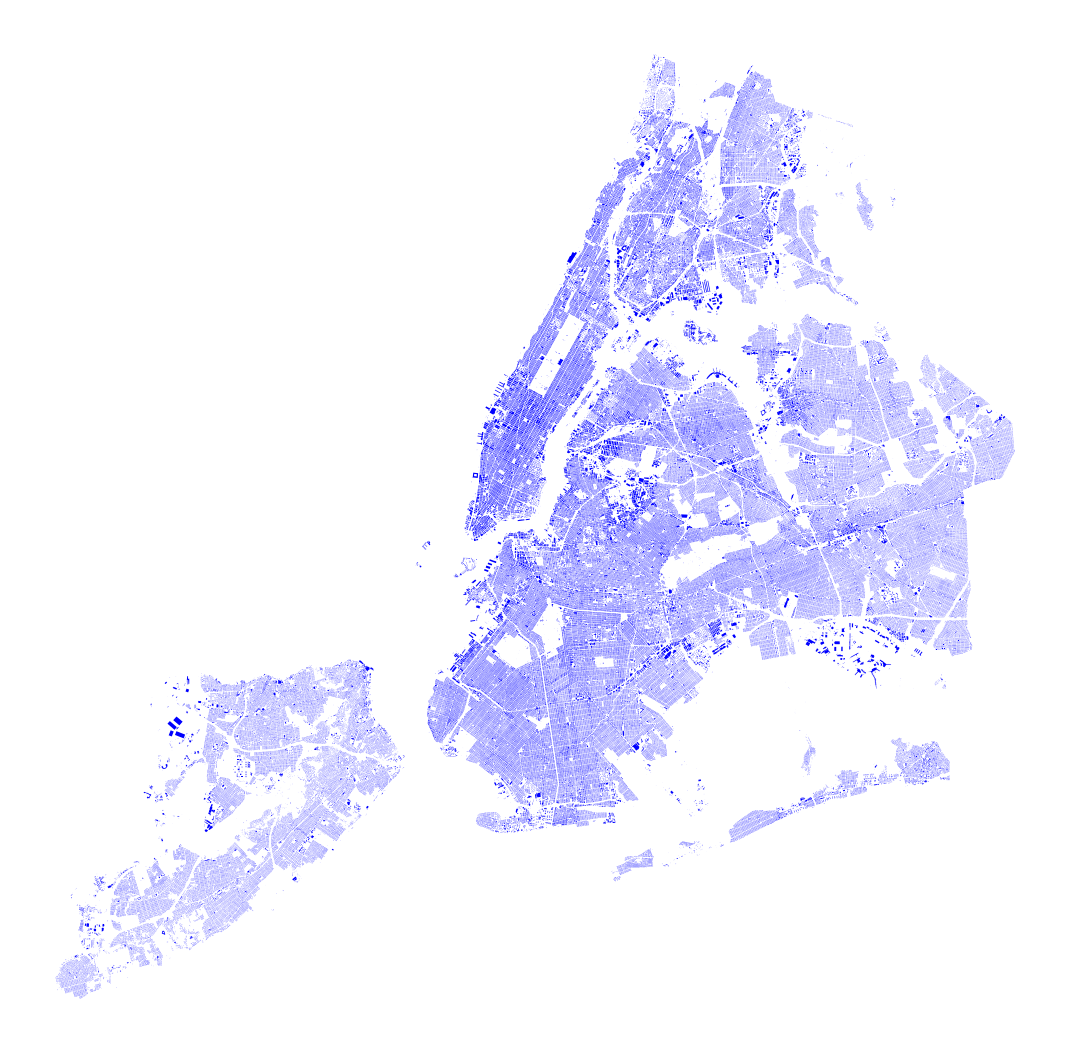

In [15]:
# creating a figure
fig, ax = plt.subplots(figsize=(20,15))

# converting to more accurate coordinate referance system
building_footprints_shp = building_footprints_shp.to_crs(epsg=2263)

# plotting geodataframe as color blue
building_footprints_shp.plot(ax=ax, color='b')

# formatting a tight layout for our plot
plt.tight_layout()

# turning off figure axis
plt.axis('off')

In [16]:
# printing dimensions of data
building_footprints_shp.shape

(1084959, 16)

Another popular dataset is NYC's PLUTO dataset. We will use this one because it comes in a zip file.

Description: Extensive land use and geographic data at the tax lot level in comma–separated values (CSV) file format. The PLUTO files contain more than seventy fields derived from data maintained by city agencies.

Dataset Link: https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page

Data Dictionary: https://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/pluto_datadictionary.pdf?v=20v1

![building_footprints_csv](images/pluto-csv.png)

## 1.4 Unzipping and reading in data as csv in memory

In [17]:
url = 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_20v1_csv.zip'

# reading in our zipfile data in-memory
content = requests.get(url)
zf = ZipFile(BytesIO(content.content))

# printing files in our zipfile
for item in zf.namelist():
    print("File in zip: "+ item)

File in zip: pluto_20v1.csv
File in zip: PLUTODD20v1.pdf
File in zip: PlutoReadme20v1.pdf


In [18]:
# read our csv data into a dataframe from our zipfile
pluto_data = pd.read_csv(zf.open('pluto_20v1.csv'))

# previewing the first five rows of data
pluto_data.head()

/Users/geribauer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (17,18,20,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


borough  block  lot     cd  ct2010  cb2010  schooldist  council  zipcode  \
0      BK    834   46  307.0   106.0  2001.0        20.0     38.0  11220.0   
1      QN   4042  106  407.0   929.0  3000.0        25.0     19.0  11356.0   
2      BK   4679   17  317.0   866.0  3002.0        18.0     41.0  11203.0   
3      BK   7831    6  318.0   676.0  1002.0        22.0     46.0  11234.0   
4      BK   7831    7  318.0   676.0  1002.0        22.0     46.0  11234.0   

  firecomp  ...  dcasdate  zoningdate  landmkdate basempdate masdate polidate  \
0     L114  ...       NaN         NaN         NaN        NaN     NaN      NaN   
1     E297  ...       NaN         NaN         NaN        NaN     NaN      NaN   
2     L174  ...       NaN         NaN         NaN        NaN     NaN      NaN   
3     L159  ...       NaN         NaN         NaN        NaN     NaN      NaN   
4     L159  ...       NaN         NaN         NaN        NaN     NaN      NaN   

  edesigdate                                               geom dcpedited  \
0        NaN  0106000020E61000000100000001030000000100000005...       NaN   
1        NaN  0106000020E61000000100000001030000000100000007...       NaN   
2        NaN  0106000020E61000000100000001030000000100000006...       NaN   
3        NaN  0106000020E61000000100000001030000000100000005...       NaN   
4        NaN  0106000020E61000000100000001030000000100000005...       NaN   

  notes  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  

[5 rows x 99 columns]

In [19]:
# printing dimensions of our data
pluto_data.shape

(859172, 99)

## 1.5 Unzipping and reading in data as csv to local folder

In [24]:
url = 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_20v1_csv.zip'

# a path to our downloads folder 
downloads_path = '../../Downloads/'

# a path to our file from our downloads path
fullfilename = os.path.join(downloads_path, 'PLUTO.gz')

# retrieving data 
urllib.request.urlretrieve(url, fullfilename)

('../../Downloads/PLUTO.gz', <http.client.HTTPMessage at 0x207a12b38>)

In [25]:
# a path to our file from our downloads folder
file_path = '../../Downloads/PLUTO.gz'

# open zipfile and saving items in our zipfolder
items = zipfile.ZipFile(file_path)

# available files in the container
print(items.namelist())

['pluto_20v1.csv', 'PLUTODD20v1.pdf', 'PlutoReadme20v1.pdf']


In [26]:
# opening zipfile using 'with' keyword in read mode
with zipfile.ZipFile(file_path, 'r') as file:
    file.extractall(downloads_path)

In [27]:
# read our data into a dataframe from our downloads path
pluto_data = pd.read_csv(downloads_path + 'pluto_20v1.csv')

In [28]:
# previewing the first five rows in data
pluto_data.head()

borough  block  lot     cd  ct2010  cb2010  schooldist  council  zipcode  \
0      BK    834   46  307.0   106.0  2001.0        20.0     38.0  11220.0   
1      QN   4042  106  407.0   929.0  3000.0        25.0     19.0  11356.0   
2      BK   4679   17  317.0   866.0  3002.0        18.0     41.0  11203.0   
3      BK   7831    6  318.0   676.0  1002.0        22.0     46.0  11234.0   
4      BK   7831    7  318.0   676.0  1002.0        22.0     46.0  11234.0   

  firecomp  ...  dcasdate  zoningdate  landmkdate basempdate masdate polidate  \
0     L114  ...       NaN         NaN         NaN        NaN     NaN      NaN   
1     E297  ...       NaN         NaN         NaN        NaN     NaN      NaN   
2     L174  ...       NaN         NaN         NaN        NaN     NaN      NaN   
3     L159  ...       NaN         NaN         NaN        NaN     NaN      NaN   
4     L159  ...       NaN         NaN         NaN        NaN     NaN      NaN   

  edesigdate                                               geom dcpedited  \
0        NaN  0106000020E61000000100000001030000000100000005...       NaN   
1        NaN  0106000020E61000000100000001030000000100000007...       NaN   
2        NaN  0106000020E61000000100000001030000000100000006...       NaN   
3        NaN  0106000020E61000000100000001030000000100000005...       NaN   
4        NaN  0106000020E61000000100000001030000000100000005...       NaN   

  notes  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  

[5 rows x 99 columns]

In [29]:
# printing dimensions of data 
pluto_data.shape

(859172, 99)

## 1.6 Unzipping and reading in data as csv from local folder


**Manually zipping a csv file of the first 20 rows of the data in a zipped file.**

In [30]:
# saving first twenty rows of our data as a new csv
building_footprints_csv.head(20).to_csv('data/sample-buildings.csv', index=False)

In [31]:
file_path = 'data/zipped-data/sample-buidlings.zip'

# create a zipfile
with zipfile.ZipFile(file_path, 'w') as file:
        # write mode overrides all the existing files in the 'Zip.'
        # you have to create the file which you have to write to the 'Zip.'
        file.write('data/sample-buildings.csv', basename('data/sample-buildings.csv'))

In [32]:
# seeing if a file is a zipfile
print(zipfile.is_zipfile(file_path))

True


In [33]:
# list items in this file path
%ls data/zipped-data/

sample-buidlings.zip


In [34]:
# save items in our zipfile
items = zipfile.ZipFile(file_path)

# available files in the container
print(items.namelist())

['sample-buildings.csv']


**Extracting the csv file of the data from the zipped file.**

In [35]:
file_name = 'data/zipped-data/sample-buidlings.zip'

# opening zip using 'with' keyword in read mode
with zipfile.ZipFile(file_name, 'r') as file:
    # extracing all items in our zipfile
    file.extractall('data/zipped-data')

In [36]:
# list files in this file path
%ls data/zipped-data/

sample-buidlings.zip  sample-buildings.csv


In [37]:
# read data as a dataframe
sample_buidlings = pd.read_csv('data/zipped-data/sample-buildings.csv')

# previewing first five rows of data
sample_buidlings.head()

the_geom  CNSTRCT_YR  NAME  \
0  MULTIPOLYGON (((-73.87129515296562 40.65717370...      2009.0   NaN   
1  MULTIPOLYGON (((-73.87670970144625 40.71425234...      1930.0   NaN   
2  MULTIPOLYGON (((-73.85195485799383 40.66235471...      1960.0   NaN   
3  MULTIPOLYGON (((-73.94029215265738 40.64108287...      1920.0   NaN   
4  MULTIPOLYGON (((-73.98998983552244 40.62383804...      1915.0   NaN   

       BIN                    LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0  3394646  08/22/2017 12:00:00 AM +0000  Constructed   1212853   21.608508   
1  4548330  08/17/2017 12:00:00 AM +0000  Constructed   1226227   10.360000   
2  4460479  08/22/2017 12:00:00 AM +0000  Constructed    581946   29.811570   
3  3355684  08/17/2017 12:00:00 AM +0000  Constructed    858061   11.200000   
4  3131737  08/22/2017 12:00:00 AM +0000  Constructed    568078   24.980000   

   FEAT_CODE  GROUNDELEV   SHAPE_AREA   SHAPE_LEN      BASE_BBL    MPLUTO_BBL  \
0     2100.0        18.0   854.662433  125.079796  3.044521e+09  3.044521e+09   
1     5110.0       122.0   217.594243   60.225858  4.030640e+09  4.030640e+09   
2     2100.0        10.0   946.427476  123.141941  4.139430e+09  4.139430e+09   
3     5110.0        32.0   248.678169   63.940817  3.049720e+09  3.049720e+09   
4     2100.0        44.0  1163.227669  165.608763  3.055100e+09  3.055100e+09   

   GEOMSOURCE  
0  Photogramm  
1  Photogramm  
2  Photogramm  
3  Photogramm  
4  Photogramm

In [38]:
# printing dimensions of data
sample_buidlings.shape

(20, 15)

## 1.7 Reading in data from Socrata Open Data API (SODA)

**Note: If you haven't signed up for an app token, there is a 1,000 rows limit.**

![building_footprints_csv](images/building-footprints-soda-api.png)

In [39]:
# Enter the information from those sections here
socrata_domain = 'data.cityofnewyork.us' # nyc open data domain
socrata_dataset_identifier = '4zxm-zkth' # building footprints dataset identifier

# App Tokens can be generated by creating an account at https://opendata.socrata.com/signup
# Tokens are optional (`None` can be used instead), though requests will be rate limited.
#
# If you choose to use a token, run the following command on the terminal (or add it to your .bashrc)
# $ export SODAPY_APPTOKEN=<token>
socrata_token = os.environ.get("SODAPY_APPTOKEN")

Source: https://github.com/xmunoz/sodapy/blob/master/examples/basic_queries.ipynb

In [40]:
# The main class that interacts with the SODA API. Sample usage:
    # from sodapy import Socrata
    # client = Socrata("opendata.socrata.com", None)
client = Socrata(socrata_domain, socrata_token)

print("Domain: {domain:}\nSession: {session:}\nURI Prefix: {uri_prefix:}".format(**client.__dict__))

Domain: data.cityofnewyork.us
Session: <requests.sessions.Session object at 0x23b7db940>
URI Prefix: https://


We are setting the **limit** at **2,000,000 rows** (i.e. the full data set).

In [41]:
# retrieving data as a dictionary 
results = client.get(socrata_dataset_identifier, limit=2000000)

# creating a dataframe from our dictionary
building_footprints_soda_api = pd.DataFrame.from_dict(results)

# printing first five rows of data
building_footprints_soda_api.head()

the_geom cnstrct_yr      bin  \
0  {'type': 'MultiPolygon', 'coordinates': [[[[-7...       2009  3394646   
1  {'type': 'MultiPolygon', 'coordinates': [[[[-7...       1930  4548330   
2  {'type': 'MultiPolygon', 'coordinates': [[[[-7...       1960  4460479   
3  {'type': 'MultiPolygon', 'coordinates': [[[[-7...       1920  3355684   
4  {'type': 'MultiPolygon', 'coordinates': [[[[-7...       1915  3131737   

                 lstmoddate   lststatype doitt_id   heightroof feat_code  \
0  2017-08-22T00:00:00.000Z  Constructed  1212853  21.60850812      2100   
1  2017-08-17T00:00:00.000Z  Constructed  1226227        10.36      5110   
2  2017-08-22T00:00:00.000Z  Constructed   581946  29.81157033      2100   
3  2017-08-17T00:00:00.000Z  Constructed   858061         11.2      5110   
4  2017-08-22T00:00:00.000Z  Constructed   568078        24.98      2100   

  groundelev       shape_area        shape_len    base_bbl  mpluto_bbl  \
0         18  854.66243317866   125.0797955584  3044520815  3044520815   
1        122  217.59424346169   60.22585821856  4030640041  4030640041   
2         10  946.42747637737  123.14194057237  4139430001  4139430001   
3         32  248.67816852809   63.94081721089  3049720006  3049720006   
4         44   1163.227668698  165.60876340496  3055100055  3055100055   

   geomsource name  
0  Photogramm  NaN  
1  Photogramm  NaN  
2  Photogramm  NaN  
3  Photogramm  NaN  
4  Photogramm  NaN

In [42]:
# printing dimensions of our data
building_footprints_soda_api.shape

(1084959, 15)

In [43]:
# closing our API request
client.close()

**Useful resources:**
    
API Docs: https://dev.socrata.com/foundry/data.cityofnewyork.us/i62d-kjv8

Sign up for app token: https://data.cityofnewyork.us/profile/edit/developer_settings

Python client for the Socrata Open Data API: https://github.com/xmunoz/sodapy

Examples: https://github.com/xmunoz/sodapy/tree/master/examples

# 2. Writing Out Data

### For simplicity, we're only exporting buildings built from 2010 to 2020

In [44]:
# saving only buildings built between 2010 and 2020 as a new dataframe
building_footprints_after_2010 = building_footprints_csv[building_footprints_csv['CNSTRCT_YR'].between(2010, 2020)]

# reset our index
building_footprints_after_2010.reset_index(drop=True, inplace=True)

In [45]:
# previewing first five rows of data
building_footprints_after_2010.head()

the_geom  CNSTRCT_YR NAME  \
0  MULTIPOLYGON (((-73.8865806294611 40.765213774...      2016.0  NaN   
1  MULTIPOLYGON (((-73.98406915139554 40.75857096...      2013.0  NaN   
2  MULTIPOLYGON (((-73.81781192423676 40.76172685...      2011.0  NaN   
3  MULTIPOLYGON (((-73.87805078807256 40.71475698...      2010.0  NaN   
4  MULTIPOLYGON (((-73.81452818900115 40.66865339...      2012.0  NaN   

       BIN                    LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0  4519592  08/22/2017 12:00:00 AM +0000  Constructed   1067231   12.030000   
1  1022662  08/22/2017 12:00:00 AM +0000  Constructed    633694   76.930000   
2  4113946  08/22/2017 12:00:00 AM +0000  Constructed   1161290   40.668351   
3  4540051  08/22/2017 12:00:00 AM +0000  Constructed   1171655   28.330225   
4  4257289  08/10/2017 12:00:00 AM +0000  Constructed   1259485   24.844319   

   FEAT_CODE  GROUNDELEV   SHAPE_AREA   SHAPE_LEN      BASE_BBL    MPLUTO_BBL  \
0     2100.0        26.0  1800.089967  196.147210  4.010770e+09  4.010770e+09   
1     2100.0        49.0  2129.626843  243.381095  1.009990e+09  1.009990e+09   
2     2100.0        76.0  1053.425939  146.180458  4.050270e+09  4.050270e+09   
3     2100.0       112.0  1314.301079  164.150193  4.030600e+09  4.030600e+09   
4     2100.0        27.0  1552.471787  167.150551  4.118590e+09  4.118590e+09   

   GEOMSOURCE  
0  Other (Man  
1  Photogramm  
2  Other (Man  
3  Photogramm  
4  Other (Man

In [46]:
# printing dimensions of our data
building_footprints_after_2010.shape

(13893, 15)

In [47]:
# display float types as two decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# sorting our construction year values and printing the unique values
building_footprints_after_2010.sort_values(by='CNSTRCT_YR').CNSTRCT_YR.unique()

array([2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018.,
       2019., 2020.])

In [48]:
# list items in data folder
%ls data/

README.md             sample-buildings.csv  zipped-data/


## 2.1 Writing to a CSV file

In [49]:
# writing files as a csv
building_footprints_after_2010.to_csv('data/building-after-2010.csv', index=False)

# listing items in data folder
%ls data/

README.md                sample-buildings.csv
building-after-2010.csv  zipped-data/


## 2.2 Writing to an Excel (xlsx) file

In [50]:
# writing files as an excel file
building_footprints_after_2010.to_excel('data/building-after-2010.xlsx', index=False)

# listing items in data folder
%ls data/

README.md                 building-after-2010.xlsx  zipped-data/
building-after-2010.csv   sample-buildings.csv


## 2.3 Writing to a JSON file

In [51]:
# writing files as json
building_footprints_after_2010.to_json('data/building-after-2010.json')

# listing items in data folder
%ls data/

README.md                 building-after-2010.json  sample-buildings.csv
building-after-2010.csv   building-after-2010.xlsx  zipped-data/


# 3. Reading In Data from Local Folder

In [52]:
# listing items in data folder
%ls data/

README.md                 building-after-2010.json  sample-buildings.csv
building-after-2010.csv   building-after-2010.xlsx  zipped-data/


## 3.1 Reading in a CSV file

In [53]:
# read data as a dataframe
building_footprints_after_2010 = pd.read_csv('data/building-after-2010.csv')

# previewing first five rows in data
building_footprints_after_2010.head()

the_geom  CNSTRCT_YR NAME  \
0  MULTIPOLYGON (((-73.8865806294611 40.765213774...     2016.00  NaN   
1  MULTIPOLYGON (((-73.98406915139554 40.75857096...     2013.00  NaN   
2  MULTIPOLYGON (((-73.81781192423676 40.76172685...     2011.00  NaN   
3  MULTIPOLYGON (((-73.87805078807256 40.71475698...     2010.00  NaN   
4  MULTIPOLYGON (((-73.81452818900115 40.66865339...     2012.00  NaN   

       BIN                    LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0  4519592  08/22/2017 12:00:00 AM +0000  Constructed   1067231       12.03   
1  1022662  08/22/2017 12:00:00 AM +0000  Constructed    633694       76.93   
2  4113946  08/22/2017 12:00:00 AM +0000  Constructed   1161290       40.67   
3  4540051  08/22/2017 12:00:00 AM +0000  Constructed   1171655       28.33   
4  4257289  08/10/2017 12:00:00 AM +0000  Constructed   1259485       24.84   

   FEAT_CODE  GROUNDELEV  SHAPE_AREA  SHAPE_LEN      BASE_BBL    MPLUTO_BBL  \
0    2100.00       26.00     1800.09     196.15 4010770041.00 4010770041.00   
1    2100.00       49.00     2129.63     243.38 1009990008.00 1009990008.00   
2    2100.00       76.00     1053.43     146.18 4050270022.00 4050270022.00   
3    2100.00      112.00     1314.30     164.15 4030600139.00 4030600139.00   
4    2100.00       27.00     1552.47     167.15 4118590023.00 4118590023.00   

   GEOMSOURCE  
0  Other (Man  
1  Photogramm  
2  Other (Man  
3  Photogramm  
4  Other (Man

In [54]:
# printing dimensions of data
building_footprints_after_2010.shape

(13893, 15)

## 3.2 Reading in an Excel file

In [55]:
# read data as a dataframe
building_footprints_after_2010 = pd.read_excel('data/building-after-2010.xlsx')

# previewing first five rows in data
building_footprints_after_2010.head()

the_geom  CNSTRCT_YR NAME  \
0  MULTIPOLYGON (((-73.8865806294611 40.765213774...        2016  NaN   
1  MULTIPOLYGON (((-73.98406915139554 40.75857096...        2013  NaN   
2  MULTIPOLYGON (((-73.81781192423676 40.76172685...        2011  NaN   
3  MULTIPOLYGON (((-73.87805078807256 40.71475698...        2010  NaN   
4  MULTIPOLYGON (((-73.81452818900115 40.66865339...        2012  NaN   

       BIN                    LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0  4519592  08/22/2017 12:00:00 AM +0000  Constructed   1067231       12.03   
1  1022662  08/22/2017 12:00:00 AM +0000  Constructed    633694       76.93   
2  4113946  08/22/2017 12:00:00 AM +0000  Constructed   1161290       40.67   
3  4540051  08/22/2017 12:00:00 AM +0000  Constructed   1171655       28.33   
4  4257289  08/10/2017 12:00:00 AM +0000  Constructed   1259485       24.84   

   FEAT_CODE  GROUNDELEV  SHAPE_AREA  SHAPE_LEN      BASE_BBL    MPLUTO_BBL  \
0    2100.00       26.00     1800.09     196.15 4010770041.00 4010770041.00   
1    2100.00       49.00     2129.63     243.38 1009990008.00 1009990008.00   
2    2100.00       76.00     1053.43     146.18 4050270022.00 4050270022.00   
3    2100.00      112.00     1314.30     164.15 4030600139.00 4030600139.00   
4    2100.00       27.00     1552.47     167.15 4118590023.00 4118590023.00   

   GEOMSOURCE  
0  Other (Man  
1  Photogramm  
2  Other (Man  
3  Photogramm  
4  Other (Man

In [56]:
# printing dimensions of data
building_footprints_after_2010.shape

(13893, 15)

## 3.3 Reading in a JSON file

In [57]:
# read data as a dataframe
building_footprints_after_2010 = pd.read_json('data/building-after-2010.json')

# previewing first five rows in data
building_footprints_after_2010.head()

the_geom  CNSTRCT_YR  NAME  \
0  MULTIPOLYGON (((-73.8865806294611 40.765213774...        2016  None   
1  MULTIPOLYGON (((-73.98406915139554 40.75857096...        2013  None   
2  MULTIPOLYGON (((-73.81781192423676 40.76172685...        2011  None   
3  MULTIPOLYGON (((-73.87805078807256 40.71475698...        2010  None   
4  MULTIPOLYGON (((-73.81452818900115 40.66865339...        2012  None   

       BIN                    LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0  4519592  08/22/2017 12:00:00 AM +0000  Constructed   1067231       12.03   
1  1022662  08/22/2017 12:00:00 AM +0000  Constructed    633694       76.93   
2  4113946  08/22/2017 12:00:00 AM +0000  Constructed   1161290       40.67   
3  4540051  08/22/2017 12:00:00 AM +0000  Constructed   1171655       28.33   
4  4257289  08/10/2017 12:00:00 AM +0000  Constructed   1259485       24.84   

   FEAT_CODE  GROUNDELEV  SHAPE_AREA  SHAPE_LEN      BASE_BBL    MPLUTO_BBL  \
0    2100.00       26.00     1800.09     196.15 4010770041.00 4010770041.00   
1    2100.00       49.00     2129.63     243.38 1009990008.00 1009990008.00   
2    2100.00       76.00     1053.43     146.18 4050270022.00 4050270022.00   
3    2100.00      112.00     1314.30     164.15 4030600139.00 4030600139.00   
4    2100.00       27.00     1552.47     167.15 4118590023.00 4118590023.00   

   GEOMSOURCE  
0  Other (Man  
1  Photogramm  
2  Other (Man  
3  Photogramm  
4  Other (Man

In [58]:
# printing dimensions of data
building_footprints_after_2010.shape

(13893, 15)

# 4. Conclusion

In this notebook, we reviewed various ways to read (load) and write (save) data from NYC Open Data. Specifically, we focused on reading our data into a pandas dataframe. We also went over common file formats that you might encounter - csv, json, shapefiles, and zip files. In Part II, we will focus on basic data inspection and wrangling techniques in the data analysis workflow.